# Clustering

In [16]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN
import seaborn as sns
import umap.umap_ as umap
from sklearn.tree import DecisionTreeClassifier

# Load Preprocessed Data from previous notebook

In [17]:
df_original = pd.read_csv('./preprocessed_numeric_log.csv')
df_cat = pd.read_csv('./preprocessed_categorical.csv')

# Feature Scaling

In [18]:
def clusterize(model):
    clusters = model.fit_predict(scaled_df)

    unscaled_numeric_features = pd.DataFrame(scaler.inverse_transform(scaled_df))
    unscaled_numeric_features.columns = df.columns
    df_clusters = pd.concat([unscaled_numeric_features, pd.Series(clusters, name='labels', index=unscaled_numeric_features.index)], axis=1)
    
    df_clusters["LogNumberOfFrequencies"] = np.exp(df_clusters["LogNumberOfFrequencies"]) -1
    df_clusters["LogAttendedClasses"] = np.exp(df_clusters["LogAttendedClasses"]) -1
    df_clusters["LogLifetimeValue"] = np.exp(df_clusters["LogLifetimeValue"]) -1
    df_clusters["LogDaysWithoutFrequency"] = np.exp(df_clusters["LogDaysWithoutFrequency"]) -1
    df_clusters["LogRealNumberOfVisits"] = np.exp(df_clusters["LogRealNumberOfVisits"]) -1
    
    s_score = silhouette_score(scaled_df, model.labels_)
    print(f"Silhouette Score: {s_score:.3f}")
    
    return df_clusters

In [19]:
two_dim = TSNE(random_state=42).fit_transform(df_original)
def plot_clusters_tsne(dataframe):
    # t-SNE visualization
    pd.DataFrame(two_dim).plot.scatter(x=0, y=1, c=dataframe['labels'], colormap='tab10', figsize=(10,10))
    plt.show()

In [20]:
def plot_clusters_umap(dataframe):
    umap_result = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42).fit_transform(df_original)
    plt.scatter(umap_result[:, 0], umap_result[:, 1], c=dataframe['labels'], cmap='viridis', alpha=0.7)
    plt.title('UMAP Visualization of Clusters')
    plt.show()

In [21]:
def assess_feature_importance(dataframe, depth=None):
    # Preparing the data
    X = dataframe.drop('labels', axis=1)
    y = dataframe['labels']

    # Splitting the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Fitting the decision tree
    dt = DecisionTreeClassifier(random_state=42, max_depth=depth)
    dt.fit(X_train, y_train)
    print("It is estimated that in average, we are able to predict {0:.2f}% of the customers correctly".format(dt.score(X_test, y_test)*100))
    return pd.Series(dt.feature_importances_, index=X_train.columns).sort_values(ascending=False)

In [22]:
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df)

## K-Means

<Axes: >

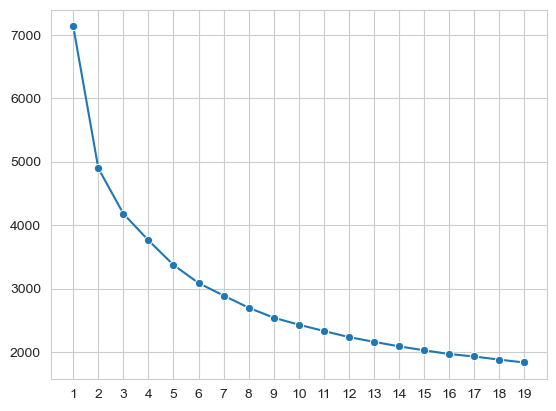

In [23]:
clusters_range = range(1, 20)
inertia = []
for i in clusters_range:
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)
    
plot = sns.lineplot(x=clusters_range, y=inertia, marker='o')
plot.set_xticks(clusters_range)
plot

In [46]:
kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)
kmeans_4_clustered_df = clusterize(kmeans)
# plot_clusters_tsne(kmeans_4_clustered_df)
df_kmeans = df.copy()
df_kmeans['labels'] = kmeans_4_clustered_df['labels']
df_kmeans.groupby('labels').mean().T
# assess_feature_importance(kmeans_4_clustered_df)
# kmeans_4_clustered_df.groupby('labels').size()

Silhouette Score: 0.220


labels,0,1,2,3
IncomeRank,7.023992,7.157847,2.437697,0.329892
EnrollmentDurationInDays,343.740434,323.482664,258.401671,326.500645
LastPeriodDurationInDays,249.264529,285.168796,242.820613,259.285161
AllowedWeeklyVisitsBySLA,6.992141,2.393248,6.984587,2.369892
AllowedNumberOfVisitsBySLA,51.518780,20.826752,49.266836,19.596770
DiffLastPeriodAndLastVisit,136.974354,173.710766,129.418013,153.110538
LogNumberOfFrequencies,3.261634,3.062979,2.697648,3.175488
LogAttendedClasses,0.182955,2.763123,0.085748,2.949597
LogLifetimeValue,5.277588,5.602617,4.768052,6.003907
LogDaysWithoutFrequency,3.405676,3.757444,3.771605,3.376334


<Axes: xlabel='labels'>

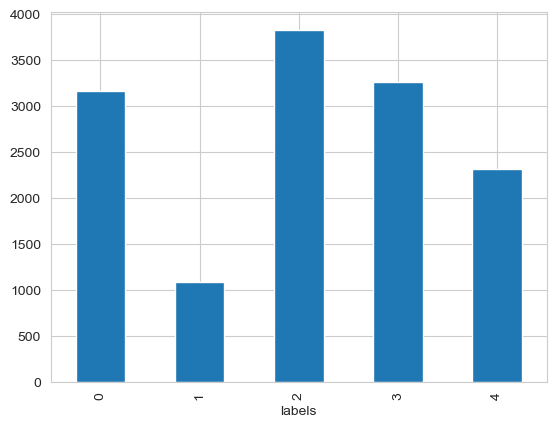

In [33]:
# bar plot size of clusters
kmeans_4_clustered_df.groupby('labels').size().plot(kind='bar')

/Users/carlos.costa/anaconda3/envs/DM2324/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


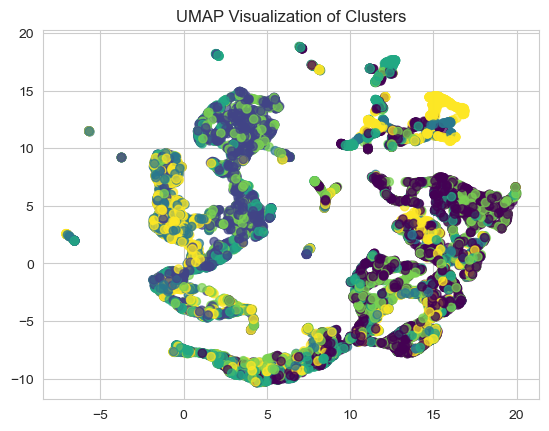

In [26]:
plot_clusters_umap(kmeans_4_clustered_df)

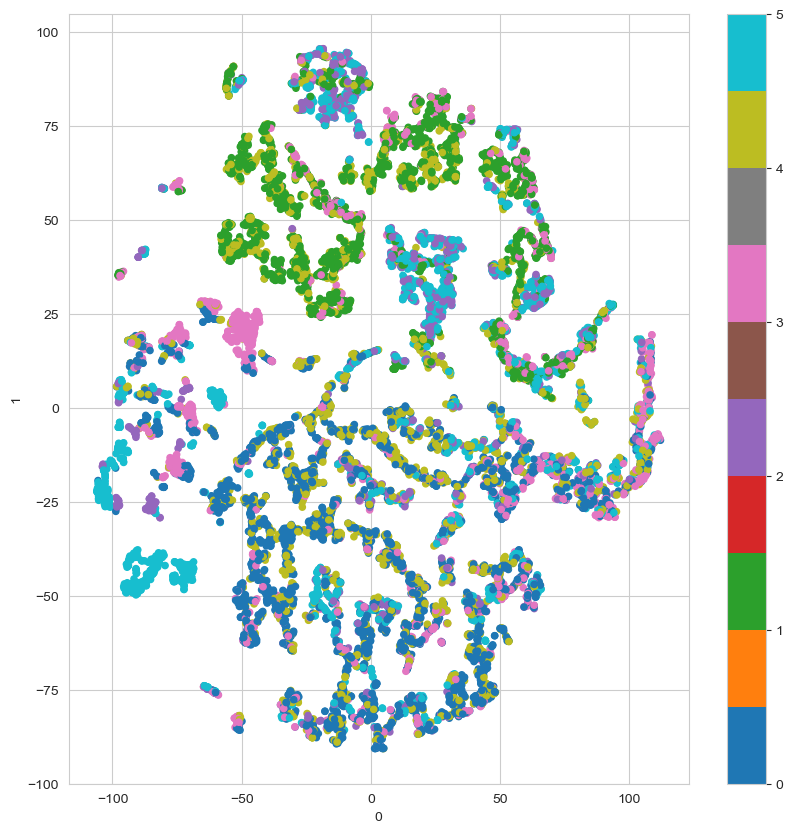

In [27]:
plot_clusters_tsne(kmeans_4_clustered_df)

In [28]:
cat_df_clusters = pd.concat([df_cat, kmeans_4_clustered_df['labels']], axis=1)
cat_df_clusters.groupby('labels').sum()

,Gender_Male,Gender_Female,UseByTime,AthleticsActivities,WaterActivities,FitnessActivities,TeamActivities,RacketActivities,CombatActivities,SpecialActivities,OtherActivities,Dropout
labels,,,,,,,,,,,,
0,1272,2174,138,18.0,303.0,2867.0,59.0,6.0,442.0,23.0,0.0,3052
1,932,1360,114,15.0,360.0,1551.0,58.0,13.0,431.0,17.0,0.0,2227
2,363,709,19,0.0,538.0,286.0,116.0,142.0,10.0,80.0,17.0,873
3,1002,1069,224,21.0,431.0,1614.0,42.0,6.0,167.0,174.0,0.0,1423
4,938,1531,166,31.0,504.0,1700.0,39.0,8.0,356.0,62.0,2.0,2272
5,1001,1290,8,18.0,1722.0,46.0,418.0,147.0,97.0,14.0,6.0,1503


# DBSCAN

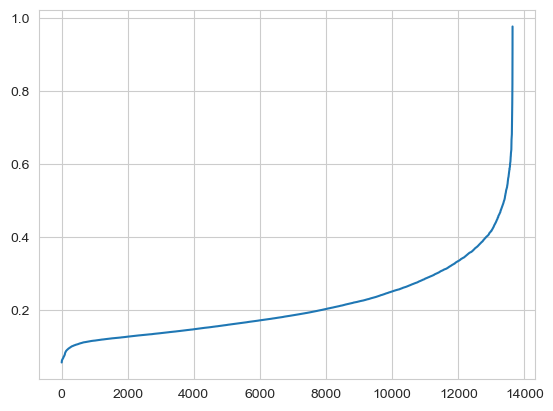

In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

dbscan_df = scaled_df.copy()

# K-distance graph to find out the right eps value
neigh = NearestNeighbors(n_neighbors=21)
neigh.fit(dbscan_df_scaled)
distances, _ = neigh.kneighbors(dbscan_df_scaled)
distances = np.sort(distances[:, -1])
distances = distances.clip(min=0, max=50)
plt.plot(distances)
plt.show()

In [48]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.35, min_samples=22, n_jobs=4)
dbscan_labels = dbscan.fit_predict(dbscan_df_scaled)

dbscan_n_clusters = len(np.unique(dbscan_labels))
print("Number of estimated clusters : %d" % dbscan_n_clusters)

Number of estimated clusters : 5


In [49]:
df_dbscan = df.copy()
df_dbscan['labels'] = dbscan_labels
df_dbscan.groupby('labels').mean().T

labels,-1,0,1,2,3
IncomeRank,4.532091,4.615349,2.819570,4.582516,2.052213
EnrollmentDurationInDays,770.985507,270.286331,400.130465,322.393826,196.850170
LastPeriodDurationInDays,294.376812,181.452150,364.253296,364.310156,182.151532
AllowedWeeklyVisitsBySLA,5.101449,6.996147,2.219292,6.997115,2.406356
AllowedNumberOfVisitsBySLA,51.293168,45.233067,19.525059,58.730710,18.612713
DiffLastPeriodAndLastVisit,231.550725,91.465249,210.040944,204.613099,106.890465
LogNumberOfFrequencies,3.865237,2.884662,2.983410,3.037172,3.192656
LogAttendedClasses,2.784045,0.082740,2.748718,0.054149,2.952530
LogLifetimeValue,6.183953,4.929153,5.693736,5.075427,5.972999
LogDaysWithoutFrequency,3.908376,3.506185,3.965354,3.777597,3.006851


/Users/carlos.costa/anaconda3/envs/DM2324/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


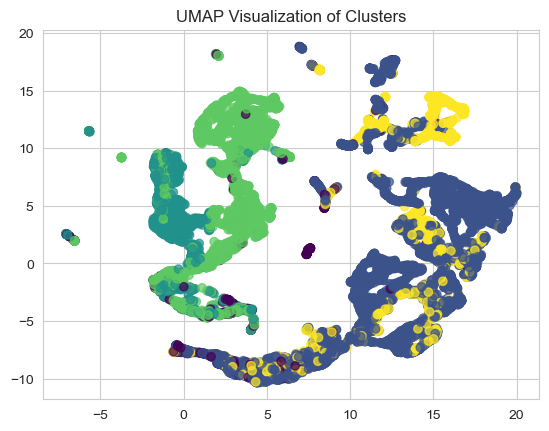

In [50]:
plot_clusters_umap(df_dbscan)

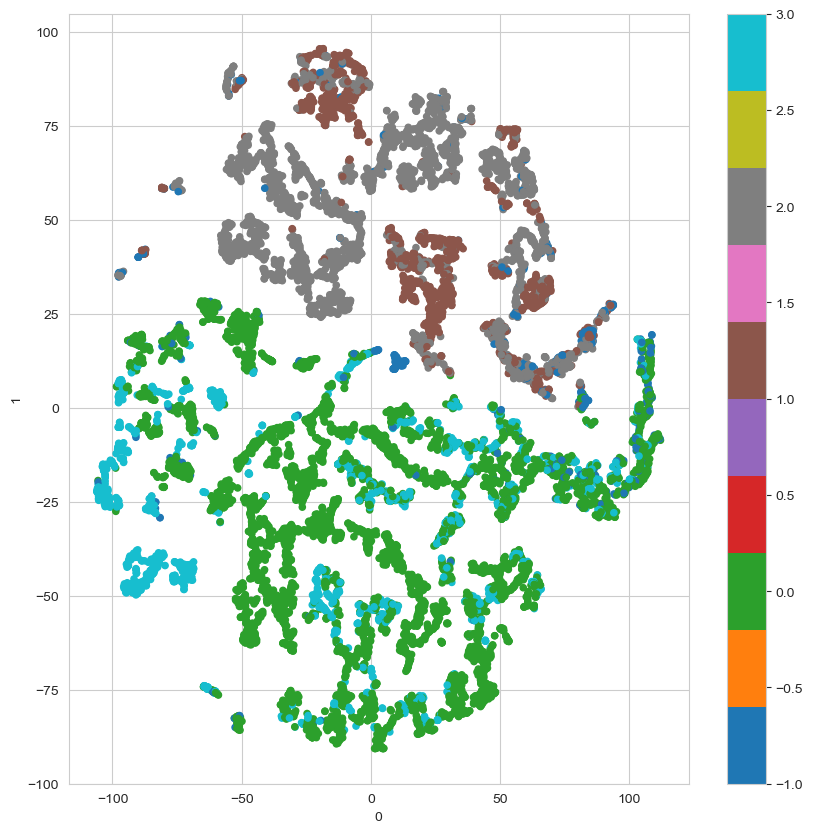

In [51]:
plot_clusters_tsne(df_dbscan)

# Checking results (double check it with ChatGPT later)
## View results
- Check if the cluster center (mean) of any variables doesn't vary much between clusters, if so, we can drop it.
- If there are clusters with too few customers, we can check if the center of the variables is similar to the other clusters, if so, we can merge them.


## Visualization
- We can plot cluster centers:
```python
df.groupby('labels') \ [scaled_features].mean().plot(kind='bar')
```

# Feature reduction
- Factor Analysis
- Multidimensional scaling

In [ ]:
assess_feature_importance(kmeans_4_clustered_df)